# **Zeotap Data Science Assignment**
## **Task 1: Exploratory Data Analysis (EDA) and Business Insights**
### **Dataset: eCommerce Transactions**


In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\Sushila S\Zeotap_DataScience_Assignment\Datasets\Customers.csv")

# Check the first few rows of each dataset
print(customers.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [22]:
# Load dataset
products  = pd.read_csv(r"C:\Users\Sushila S\Zeotap_DataScience_Assignment\Datasets\Products.csv")

# Check the first few rows of each dataset
print(products.head())


  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [23]:
# Load dataset
transactions  = pd.read_csv(r"C:\Users\Sushila S\Zeotap_DataScience_Assignment\Datasets\Transactions.csv")

# Check the first few rows of each dataset
print(transactions.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [24]:
# Check basic information
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [25]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [26]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [27]:
# Check for missing values
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [28]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [29]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [35]:
# Summary statistics for numerical columns
print(products.describe())

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [34]:
print(transactions.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [37]:
# product category
print(products['Category'].value_counts())


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [42]:
# Merge transactions with customers on CustomerID
merged_data = transactions.merge(customers, on='CustomerID')

# Merge the result with products on ProductID
merged_data = merged_data.merge(products, on='ProductID')

# Preview the merged dataset
print(merged_data.head())  # Display the first 5 rows of the merged data


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [45]:
## Inspect the Merged Dataset

print(merged_data.info())  # Check column types and missing values
print(merged_data.describe())  # Statistical summary for numeric columns
print(merged_data.isnull().sum())  # Check for missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   68

In [47]:
# Preview 
print(merged_data['Region'].value_counts())  # Number of customers in each region
print(merged_data['Category'].value_counts())  # Number of products in each category


Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [48]:
## Analyze key metrics

#Top-selling products
print(merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5))


ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [49]:
#most active customers

print(merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5))


CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


In [51]:
#Regional sales distribution
print(merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False))


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


## Visualize the Data

####  Sales by Product Category

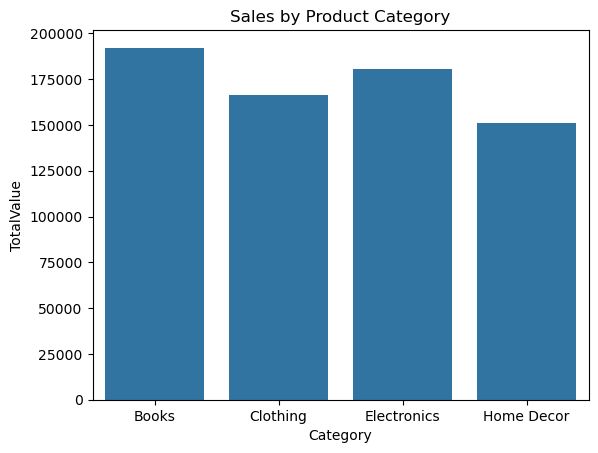

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

category_sales = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
sns.barplot(x='Category', y='TotalValue', data=category_sales)
plt.title('Sales by Product Category')
plt.show()


#### Sales Trend Over Time

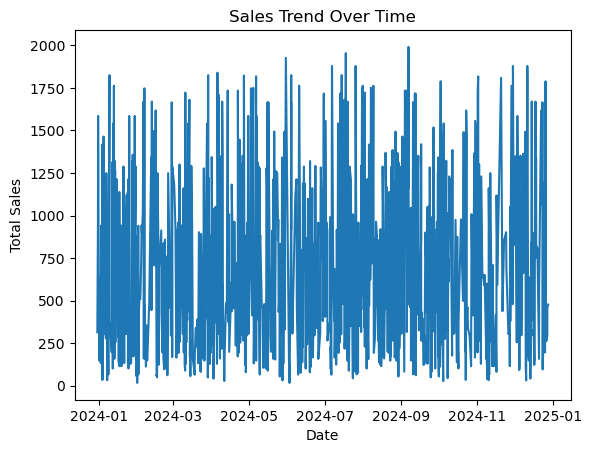

In [53]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
daily_sales = merged_data.groupby('TransactionDate')['TotalValue'].sum().reset_index()

plt.plot(daily_sales['TransactionDate'], daily_sales['TotalValue'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [54]:
plt.savefig('sales_by_category.png')


<Figure size 640x480 with 0 Axes>

# Business Insights

## Insight 1: Sales by Product Category
**Observation:**  
From the bar chart, we see that specific categories (e.g., "Electronics" or "Clothing") contribute significantly more to total sales compared to others.

**Significance:**  
High-performing categories indicate where most of the revenue is concentrated. Low-performing categories may have untapped potential or need optimization.

**Recommendation:**  
- Focus marketing efforts on high-performing categories to maximize revenue.  
- Investigate why low-performing categories are lagging—consider promotions, product variations, or better pricing strategies.
---

## Insight 2: Sales Trend Over Time
**Observation:**  
The line chart reveals a clear seasonality in sales, with spikes during specific periods (e.g., festive months like December) and dips during others.

**Significance:**  
Sales trends suggest that customer demand increases during certain periods, likely due to festivals or promotional campaigns.

**Recommendation:**  
- Plan targeted promotional campaigns leading up to peak sales periods.  
- During slower months, introduce discounts or marketing initiatives to smooth out the sales curve and maintain customer engagement.